In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded

In [414]:
uploaded.keys()

dict_keys(['WA_Fn-UseC_-Telco-Customer-Churn.csv'])

In [437]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [438]:
df = df.drop(columns=["customerID"])

In [439]:
df.shape

(7043, 20)

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [441]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [442]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0.0)

In [443]:
df.columns = df.columns.str.strip()

In [444]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [445]:
df.duplicated().sum()

np.int64(22)

In [446]:
df = df.drop_duplicates()

In [447]:
(df == "").sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [448]:
df['Churn'].value_counts()

,count
Churn,
No,5164
Yes,1857


/tmp/ipython-input-2009909292.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


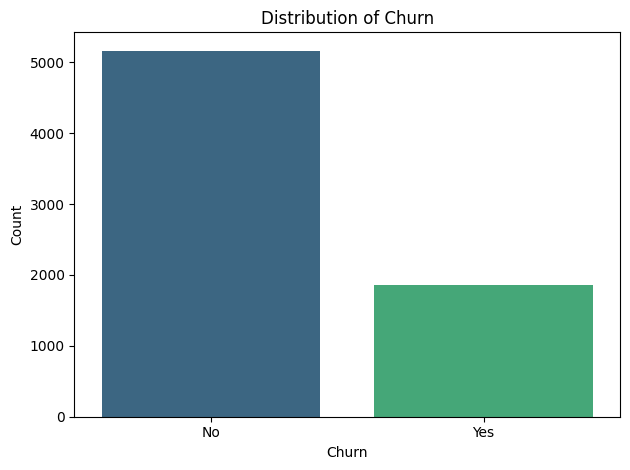

In [449]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [450]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


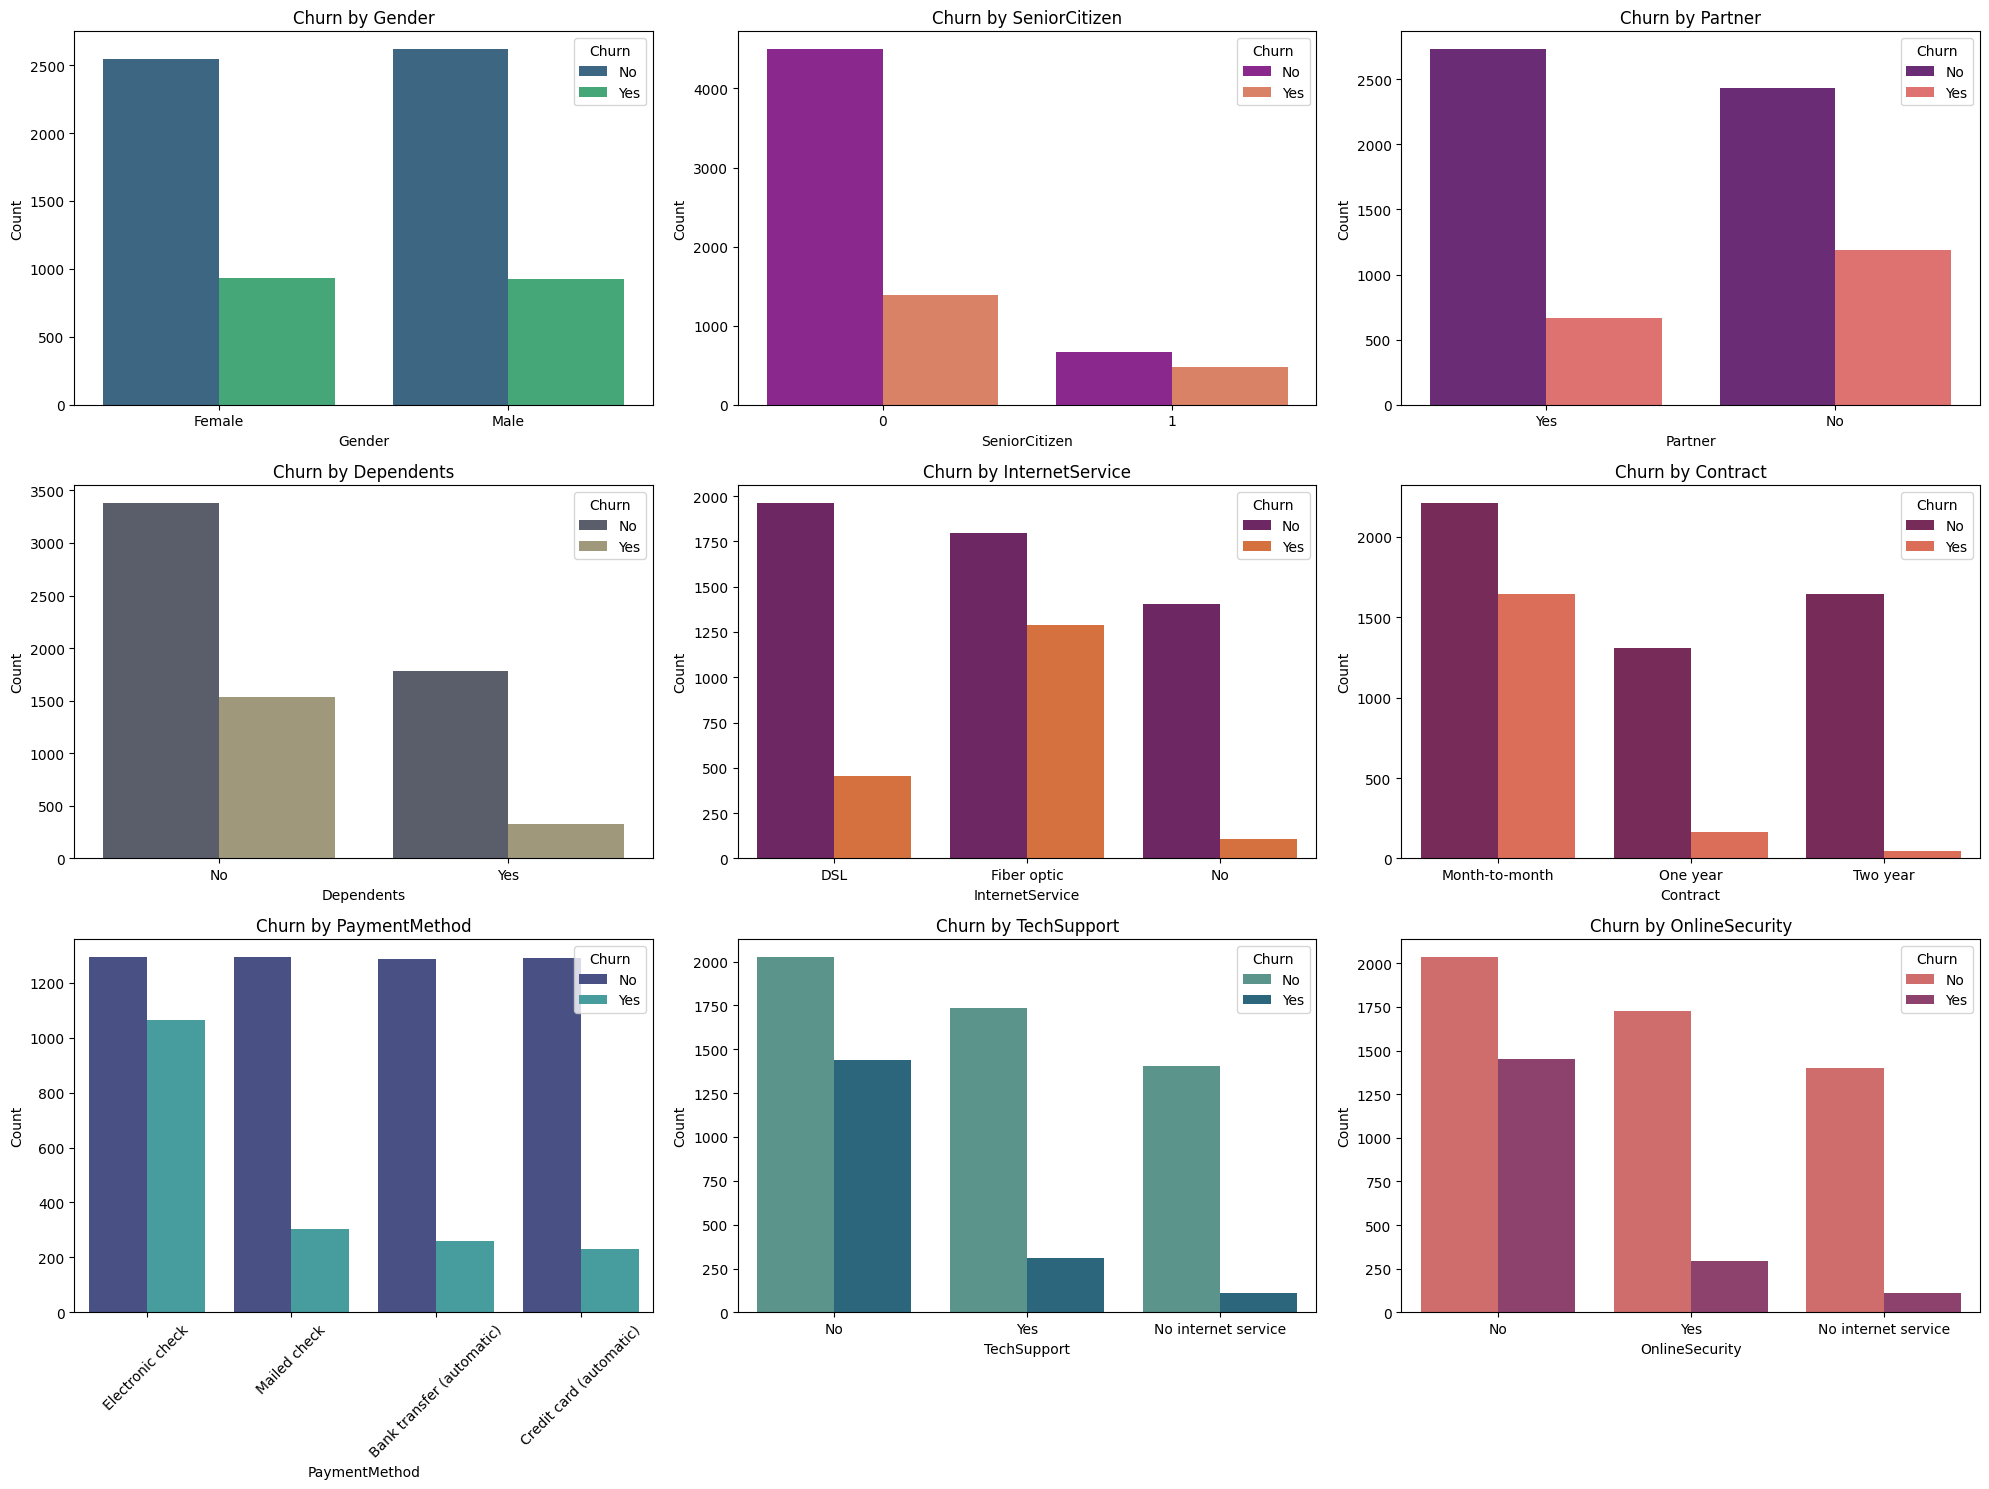

In [451]:
# Plot churn rate by categorical features
plt.figure(figsize=(20, 15))

# Churn by gender
plt.subplot(3, 3, 1)
sns.countplot(x='gender', hue='Churn', data=df, palette='viridis')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Churn by SeniorCitizen
plt.subplot(3, 3, 2)
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='plasma')
plt.title('Churn by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')

# Churn by Partner
plt.subplot(3, 3, 3)
sns.countplot(x='Partner', hue='Churn', data=df, palette='magma')
plt.title('Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Count')

# Churn by Dependents
plt.subplot(3, 3, 4)
sns.countplot(x='Dependents', hue='Churn', data=df, palette='cividis')
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')

# Churn by InternetService
plt.subplot(3, 3, 5)
sns.countplot(x='InternetService', hue='Churn', data=df, palette='inferno')
plt.title('Churn by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')

# Churn by Contract
plt.subplot(3, 3, 6)
sns.countplot(x='Contract', hue='Churn', data=df, palette='rocket')
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')

# Churn by PaymentMethod
plt.subplot(3, 3, 7)
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='mako')
plt.title('Churn by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Churn by TechSupport
plt.subplot(3, 3, 8)
sns.countplot(x='TechSupport', hue='Churn', data=df, palette='crest')
plt.title('Churn by TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Count')

# Churn by OnlineSecurity
plt.subplot(3, 3, 9)
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='flare')
plt.title('Churn by OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [452]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight

X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [453]:
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [c for c in X.columns if c not in numerical_cols]

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ], remainder="drop")

X_train_p = preprocess.fit_transform(X_train)
X_test_p = preprocess.transform(X_test)

cw_vals = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {int(cls): float(w) for cls, w in zip(np.unique(y_train), cw_vals)}

print("X_train_proc shape:", X_train_p.shape)
print("X_test_proc shape: ", X_test_p.shape)
print("y_train dist:\n", y_train.value_counts())
print("class_weights:", class_weights)

X_train_proc shape: (5616, 45)
X_test_proc shape:  (1405, 45)
y_train dist:
 Churn
0    4131
1    1485
Name: count, dtype: int64
class_weights: {0: 0.6797385620915033, 1: 1.8909090909090909}


In [454]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_p.shape[1],)),  # Layer 1
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),                             # Layer 2
    BatchNormalization(),

    Dense(16, activation='relu'),                             # Layer 3
    BatchNormalization(),

    Dense(8, activation='relu'),                             # Layer 4
    BatchNormalization(),

    Dense(1, activation='sigmoid')                            # Output layer (binary)
])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)

# Compile
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss', patience=5, restore_best_weights=True
        )
    ]

# Training
history = model.fit(
    X_train_p, y_train,
    epochs=50,                 # higher, but early stopping will stop earlier if needed
    batch_size=32,
    validation_data=(X_test_p, y_test),
    class_weight=class_weights,   # imbalance handling
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6871 - auc: 0.7580 - loss: 0.5877 - val_accuracy: 0.7388 - val_auc: 0.8385 - val_loss: 0.5377
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7449 - auc: 0.8260 - loss: 0.5106 - val_accuracy: 0.7082 - val_auc: 0.8379 - val_loss: 0.5374
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7253 - auc: 0.8279 - loss: 0.5057 - val_accuracy: 0.7431 - val_auc: 0.8329 - val_loss: 0.5067
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7484 - auc: 0.8370 - loss: 0.4995 - val_accuracy: 0.7530 - val_auc: 0.8411 - val_loss: 0.4971
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7404 - auc: 0.8395 - loss: 0.4918 - val_accuracy: 0.7665 - val_auc: 0.8424 - val_loss: 0.4676
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7704 - auc: 0.8488 - loss: 0.4827 - val_accuracy: 0.7367 - val_auc: 0.8396 - val_loss: 0.5298
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

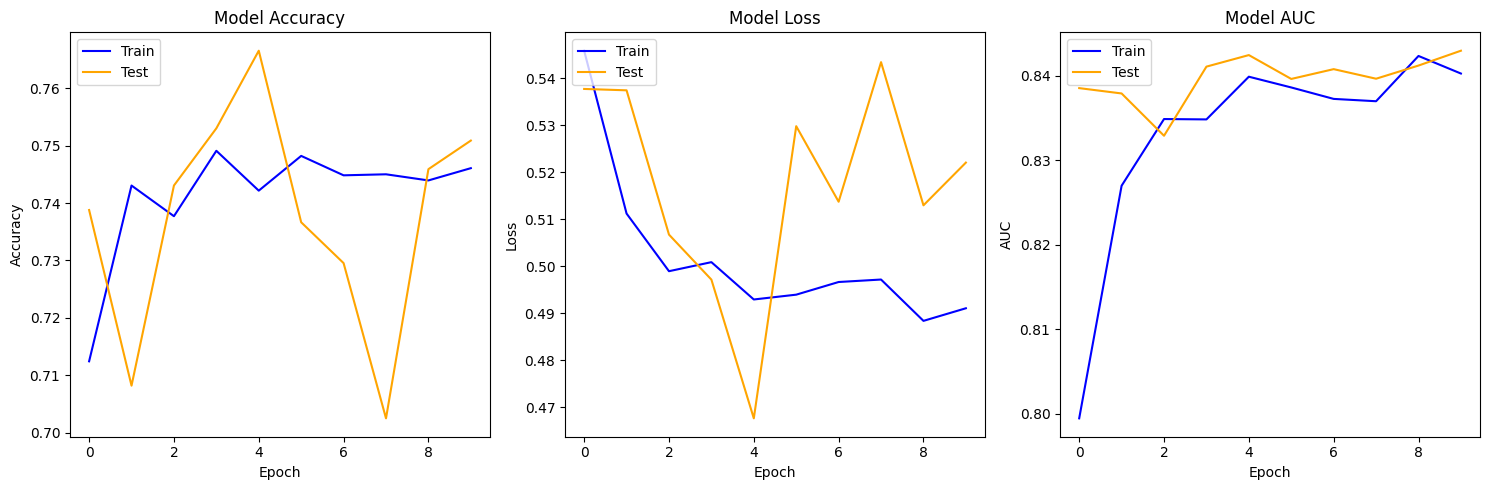

In [455]:
# Plot training history
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation AUC
plt.subplot(1, 3, 3)
plt.plot(history.history['auc'], color='blue')
plt.plot(history.history['val_auc'], color='orange')
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [469]:
# Predict probabilities (needed for AUC)
y_pred_prob = model.predict(X_test_p)

# Predict classes (0/1) using 0.5 threshold
y_pred = (y_pred_prob >= 0.45).astype(int)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [470]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("Test AUC:", auc_score)

Confusion Matrix:
 [[761 272]
 [ 79 293]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81      1033
           1       0.52      0.79      0.63       372

    accuracy                           0.75      1405
   macro avg       0.71      0.76      0.72      1405
weighted avg       0.80      0.75      0.76      1405

Test AUC: 0.842499921931112


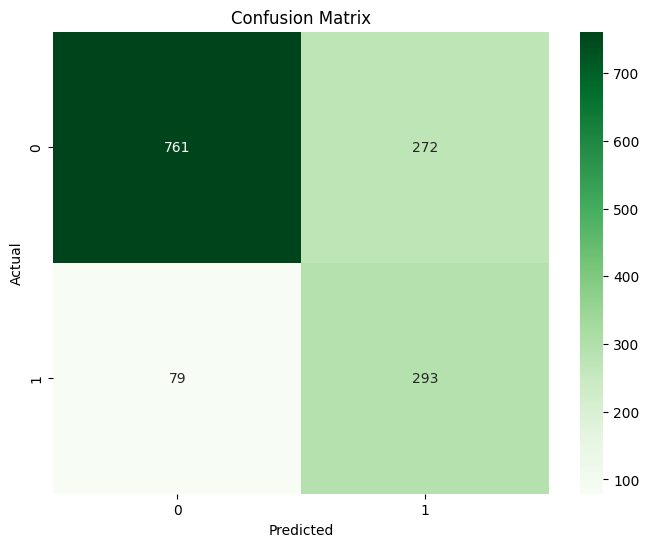

In [471]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

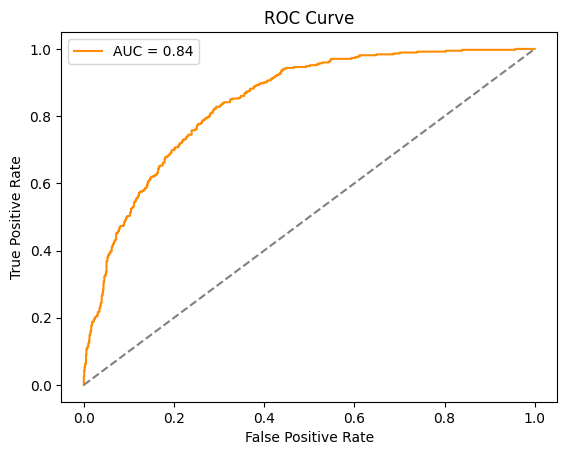

In [472]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange')
plt.plot([0,1],[0,1],'--', color='gray')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [477]:
import joblib

# Save your chosen threshold
threshold = 0.45
joblib.dump(threshold, "churn_threshold.pkl")

['churn_threshold.pkl']

In [474]:
joblib.dump(preprocess, "churn_preprocessor.pkl")

['churn_preprocessor.pkl']

In [475]:
# Save the ANN model
model.save("churn_ann_model.keras")